In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import src.dataset_info
df = pd.read_csv("labels.csv")
df.head()

,idx,Agro-forestry areas,Airports,Annual crops associated with permanent crops,Bare rock,Beaches dunes sands,Broad-leaved forest,Burnt areas,Coastal lagoons,Complex cultivation patterns,...,Salines,Salt marshes,Sclerophyllous vegetation,Sea and ocean,Sparsely vegetated areas,Sport and leisure facilities,Transitional woodland/shrub,Vineyards,Water bodies,Water courses
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


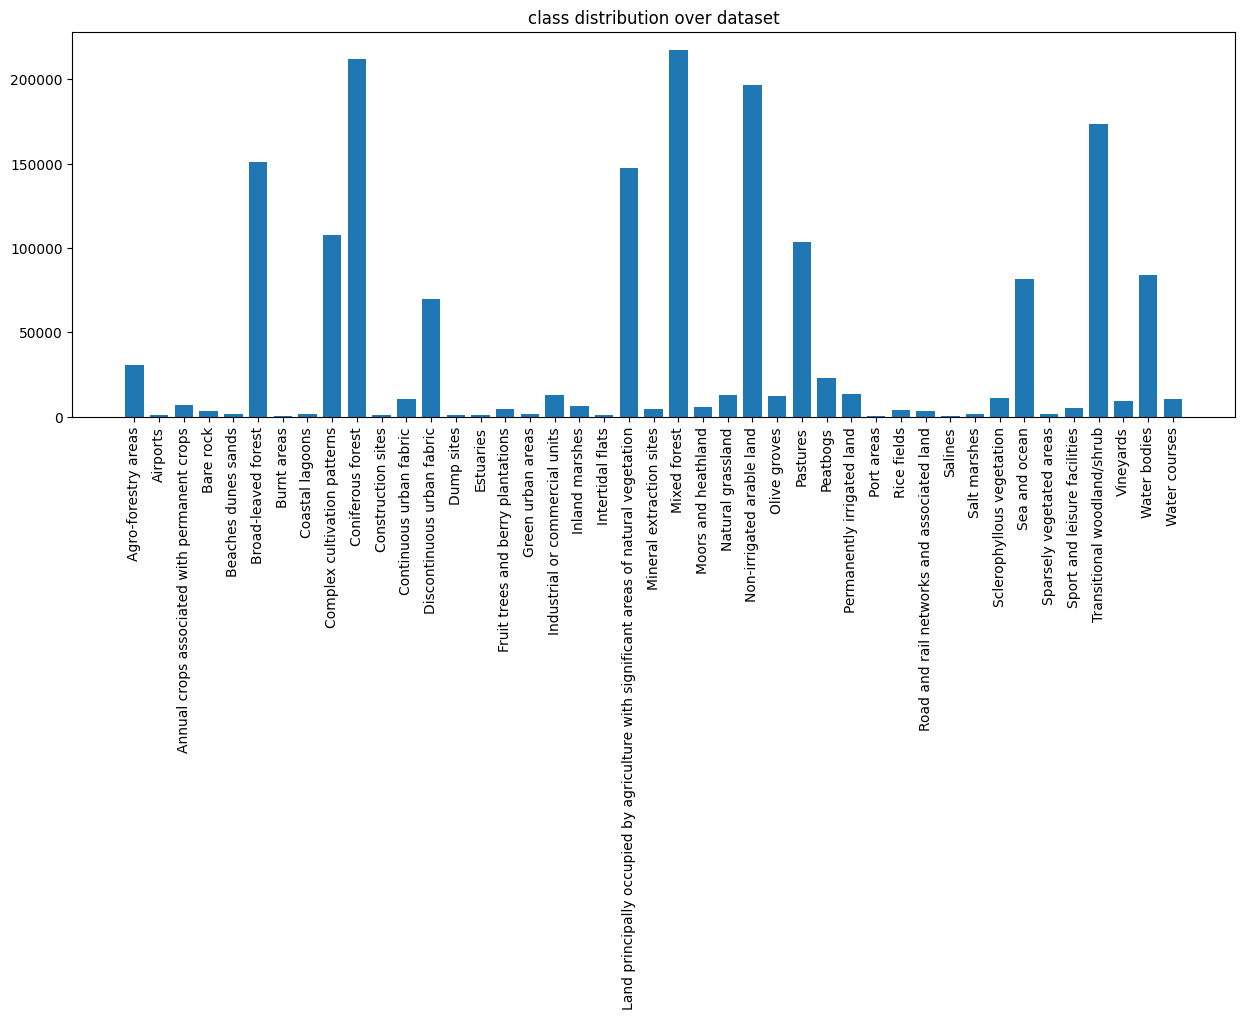

In [162]:
sum_labels = df.sum()[1:].values
plt.figure(figsize=(15,5))
plt.bar(np.linspace(0,45,len(sum_labels)),sum_labels)
plt.xticks(np.linspace(0,45,len(sum_labels)),src.dataset_info.LABELS_DS,rotation=90)
plt.title("class distribution over dataset")
plt.show()

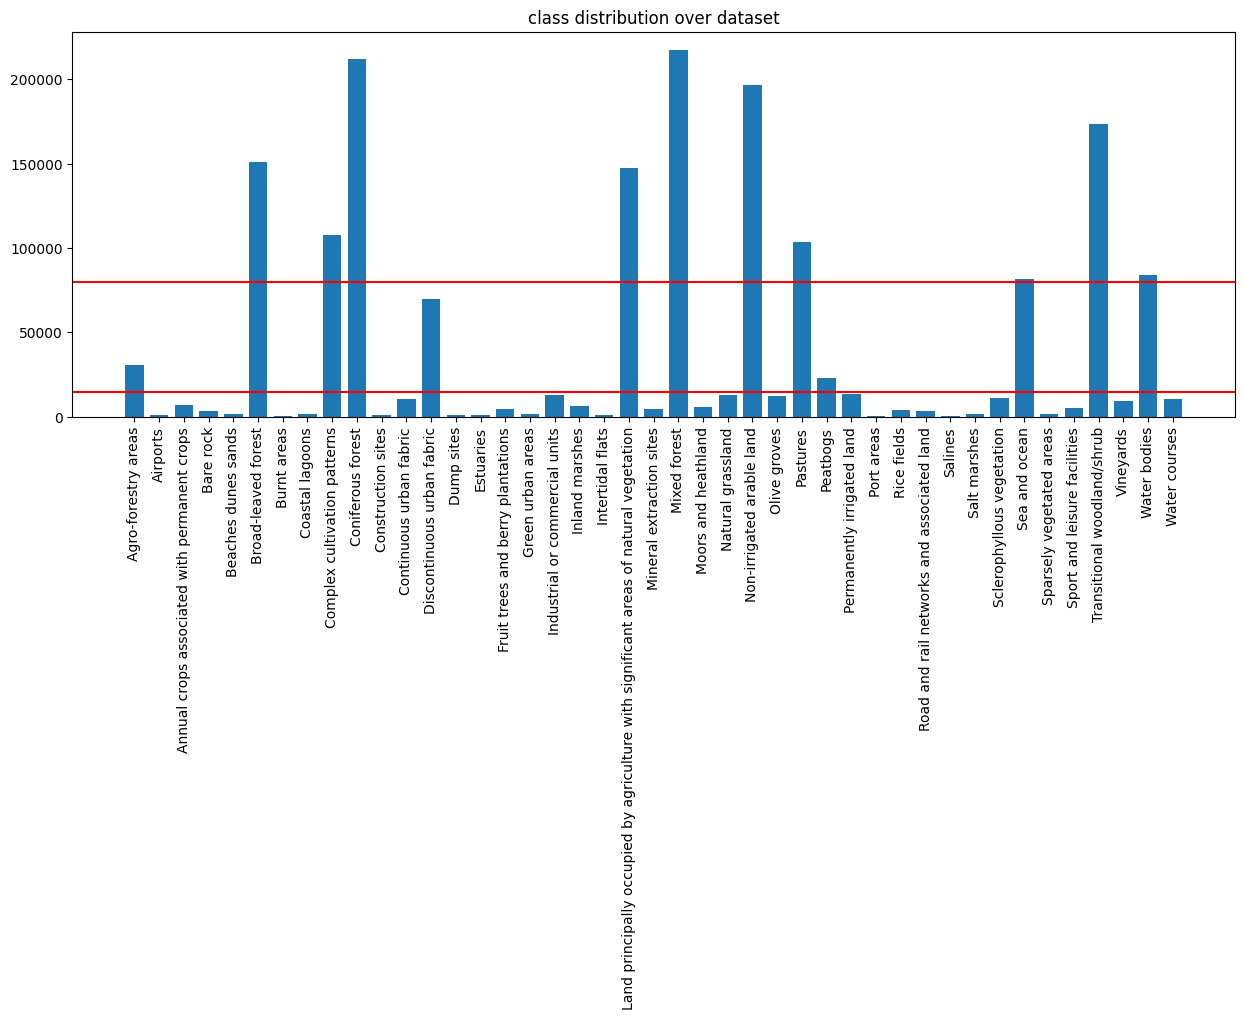

In [163]:
sum_classes = df.sum()[1:]
sum_labels = sum_classes.values
plt.figure(figsize=(15,5))
plt.bar(np.linspace(0,45,len(sum_labels)),sum_labels)
plt.axhline(15000,color='r')
plt.axhline(80000,color='r')
plt.xticks(np.linspace(0,45,len(sum_labels)),src.dataset_info.LABELS_DS,rotation=90)
plt.title("class distribution over dataset")
plt.show()

In [164]:
sum_classes = df.sum()
df_pruned = df.filter(items = np.array(df.columns)[sum_classes.values>15000])
df_pruned.head()

,idx,Agro-forestry areas,Broad-leaved forest,Complex cultivation patterns,Coniferous forest,Discontinuous urban fabric,Land principally occupied by agriculture with significant areas of natural vegetation,Mixed forest,Non-irrigated arable land,Pastures,Peatbogs,Sea and ocean,Transitional woodland/shrub,Water bodies
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0,0,0,0,0,0,0,0,0,0,1,0,0


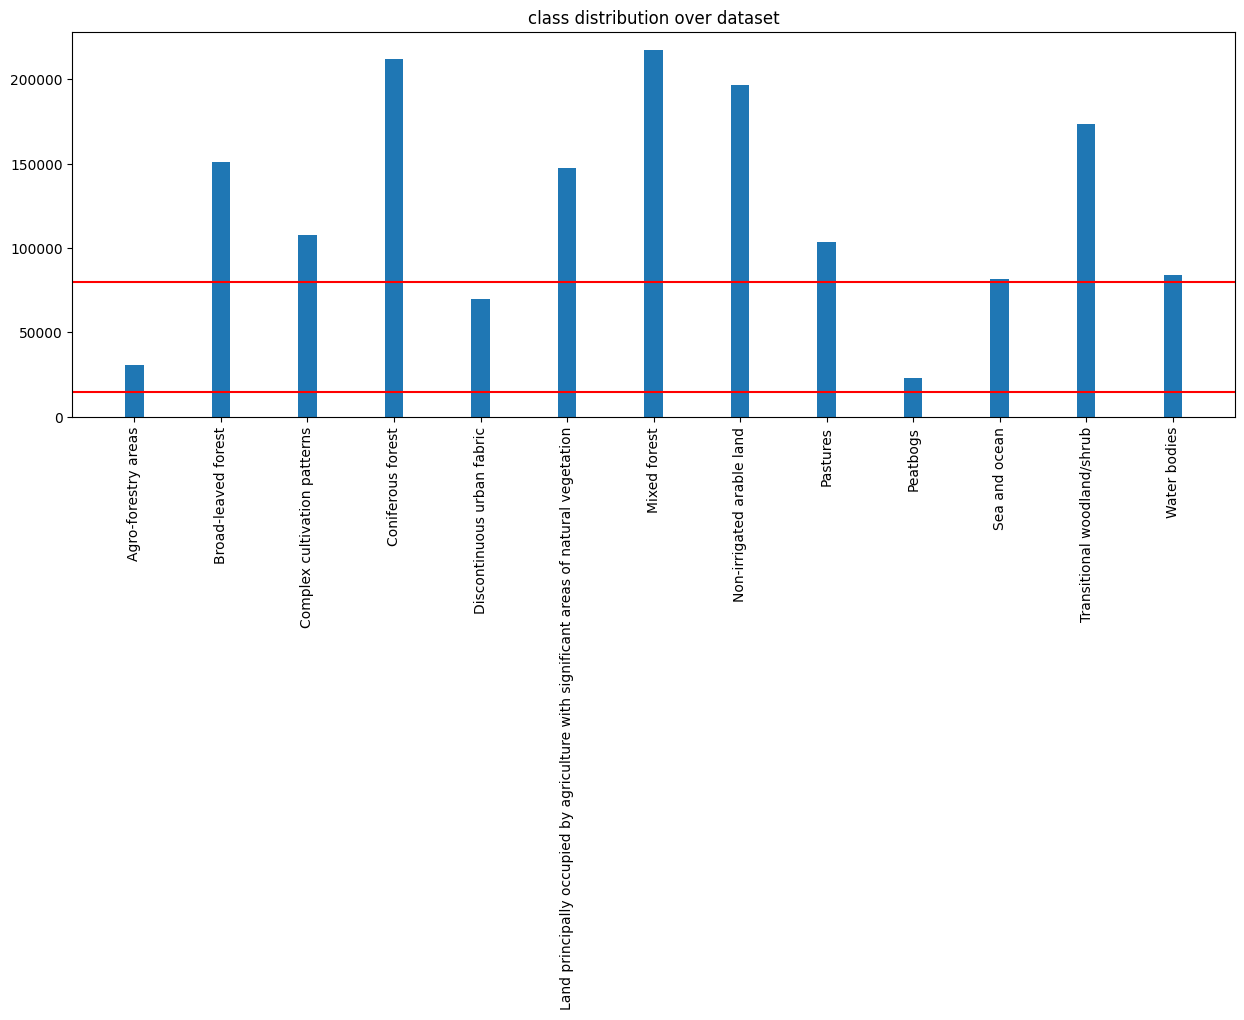

In [165]:
sum_classes = df_pruned.sum()[1:]
sum_labels = sum_classes.values
plt.figure(figsize=(15,5))
plt.bar(np.linspace(0,45,len(sum_labels)),sum_labels)
plt.axhline(15000,color='r')
plt.axhline(80000,color='r')
plt.xticks(np.linspace(0,45,len(sum_labels)),np.array(df_pruned.columns)[1:],rotation=90)
plt.title("class distribution over dataset")
plt.show()

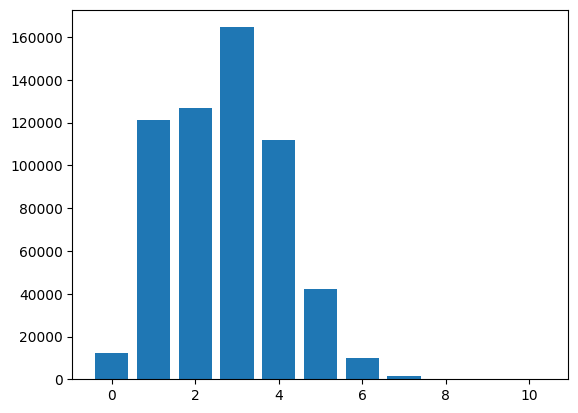

In [166]:
df_sum_rows = df_pruned.drop('idx',axis=1).sum(axis=1)
df_pruned_ = df_pruned[df_sum_rows.values != 0]
df_grouped_count = df_sum_rows.groupby(lambda x: df_sum_rows[x]).count()
plt.bar([i for i in range(max(df_sum_rows))], df_grouped_count)
plt.show()

Multi-Label Classification

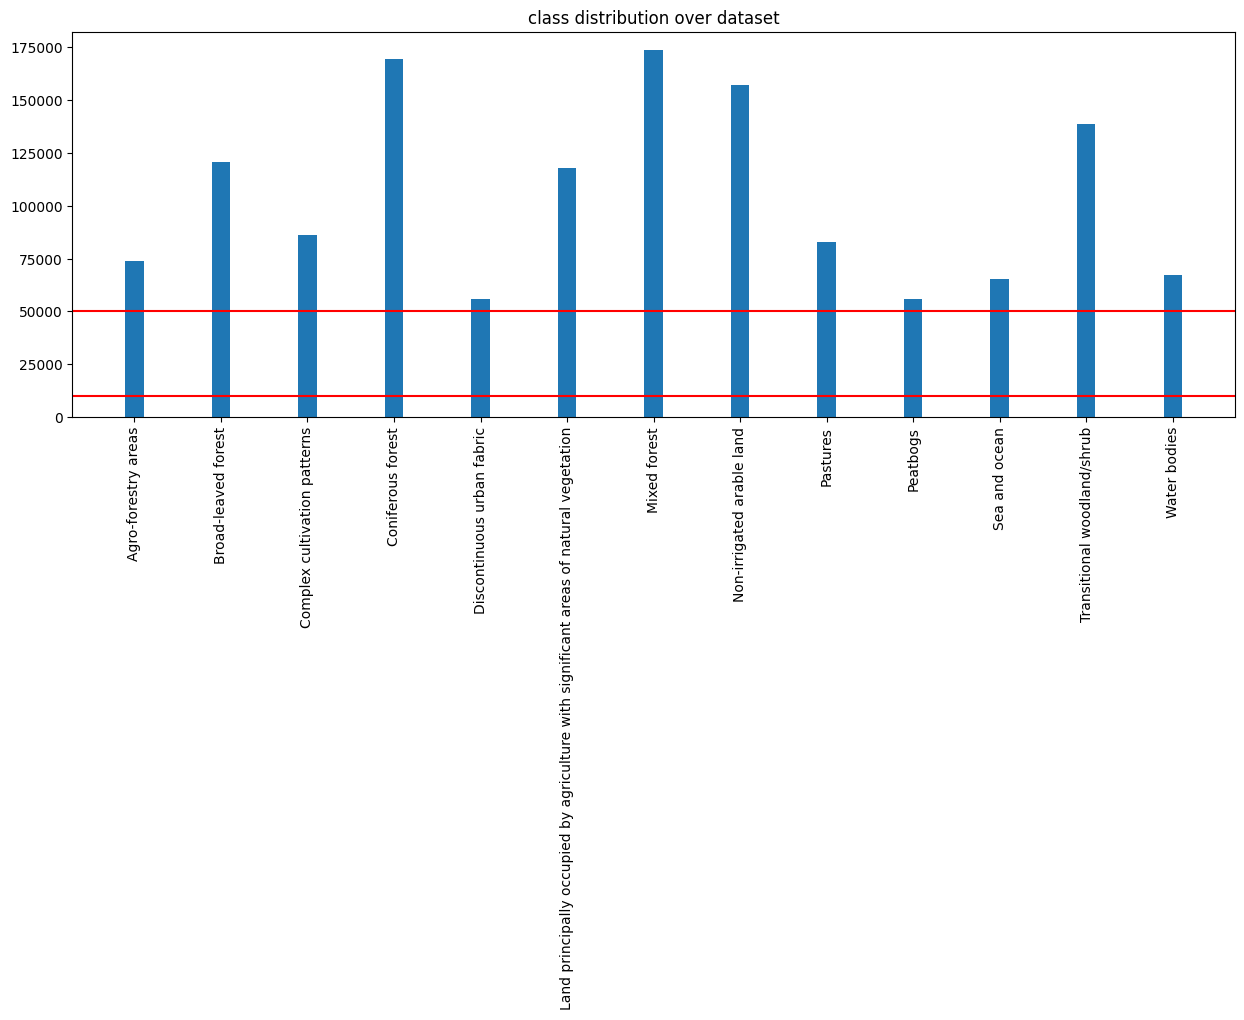

In [167]:
sum_classes = df_pruned_.sum()[1:]
sum_labels = sum_classes.values * 0.8 * np.array([3,1,1,1,1,1,1,1,1,3,1,1,1]) #generate values
plt.figure(figsize=(15,5))
plt.bar(np.linspace(0,45,len(sum_labels)),sum_labels)
plt.axhline(10000,color='r')
plt.axhline(50000,color='r')
plt.xticks(np.linspace(0,45,len(sum_labels)),np.array(df_pruned.columns)[1:],rotation=90)
plt.title("class distribution over dataset")
plt.show()

In [168]:
df_pruned_[df_pruned_['Agro-forestry areas'] == 1].head()

,idx,Agro-forestry areas,Broad-leaved forest,Complex cultivation patterns,Coniferous forest,Discontinuous urban fabric,Land principally occupied by agriculture with significant areas of natural vegetation,Mixed forest,Non-irrigated arable land,Pastures,Peatbogs,Sea and ocean,Transitional woodland/shrub,Water bodies
26129,26130,1,1,1,0,0,1,0,0,0,0,0,1,0
26130,26131,1,0,1,0,0,0,0,0,0,0,0,1,0
26131,26132,1,1,0,0,0,0,0,0,0,0,0,1,0
26133,26134,1,1,1,0,0,0,0,1,0,0,0,1,0
26134,26135,1,1,0,0,0,0,0,1,1,0,0,1,0


In [169]:
df_pruned.to_csv("labels_cut.csv", index=False)
df_pruned_.to_csv("labels_cut_no_0.csv", index=False)

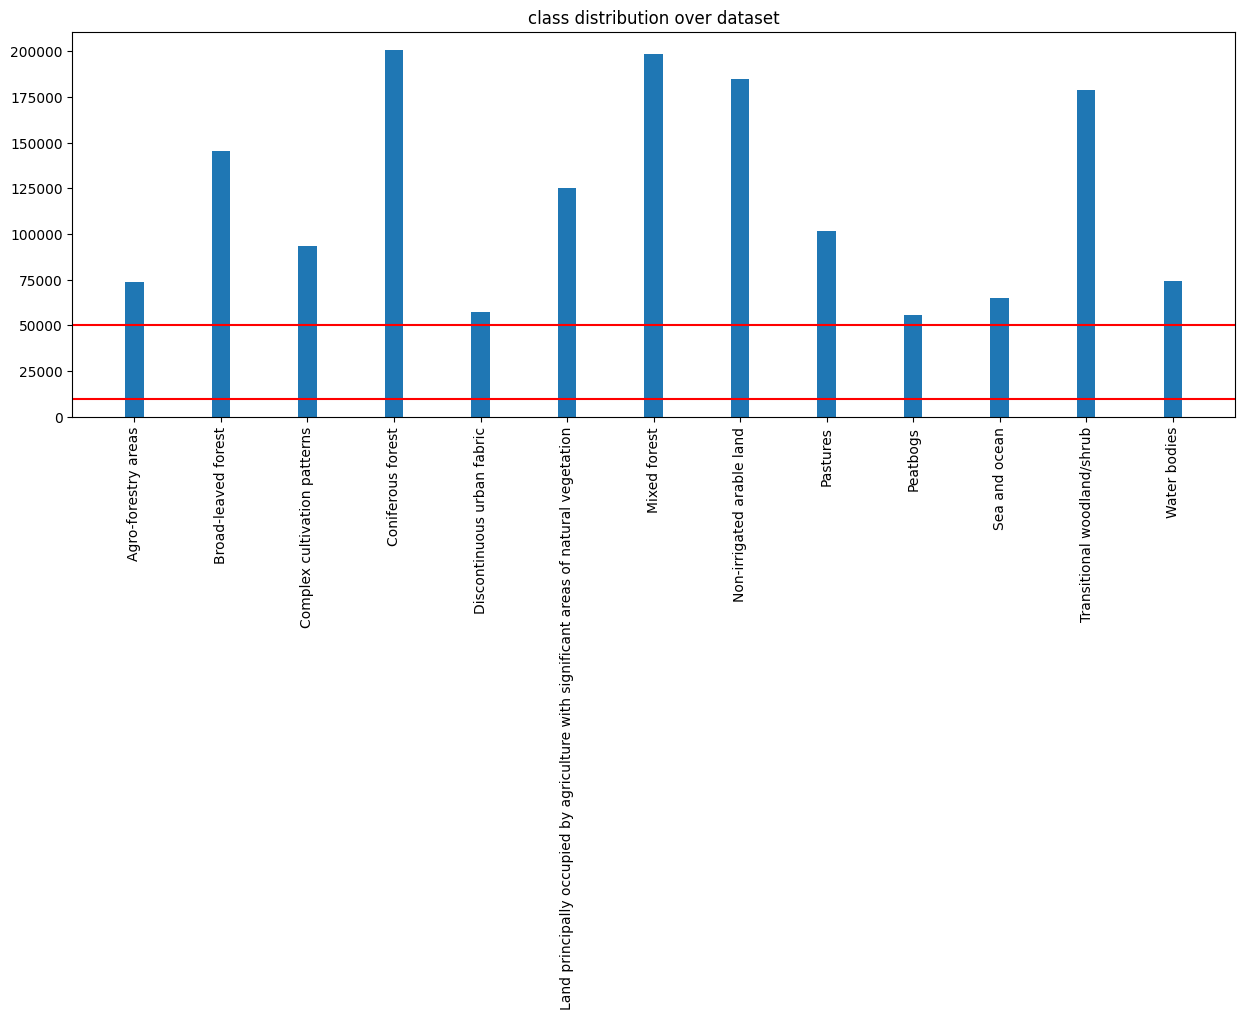

In [171]:
df_train = pd.read_csv("train_labels.csv")
sum_classes = df_train.sum()[1:]
sum_labels = sum_classes.values
plt.figure(figsize=(15,5))
plt.bar(np.linspace(0,45,len(sum_labels)),sum_labels)
plt.axhline(10000,color='r')
plt.axhline(50000,color='r')
plt.xticks(np.linspace(0,45,len(sum_labels)),np.array(df_pruned.columns)[1:],rotation=90)
plt.title("class distribution over training set")
plt.show()

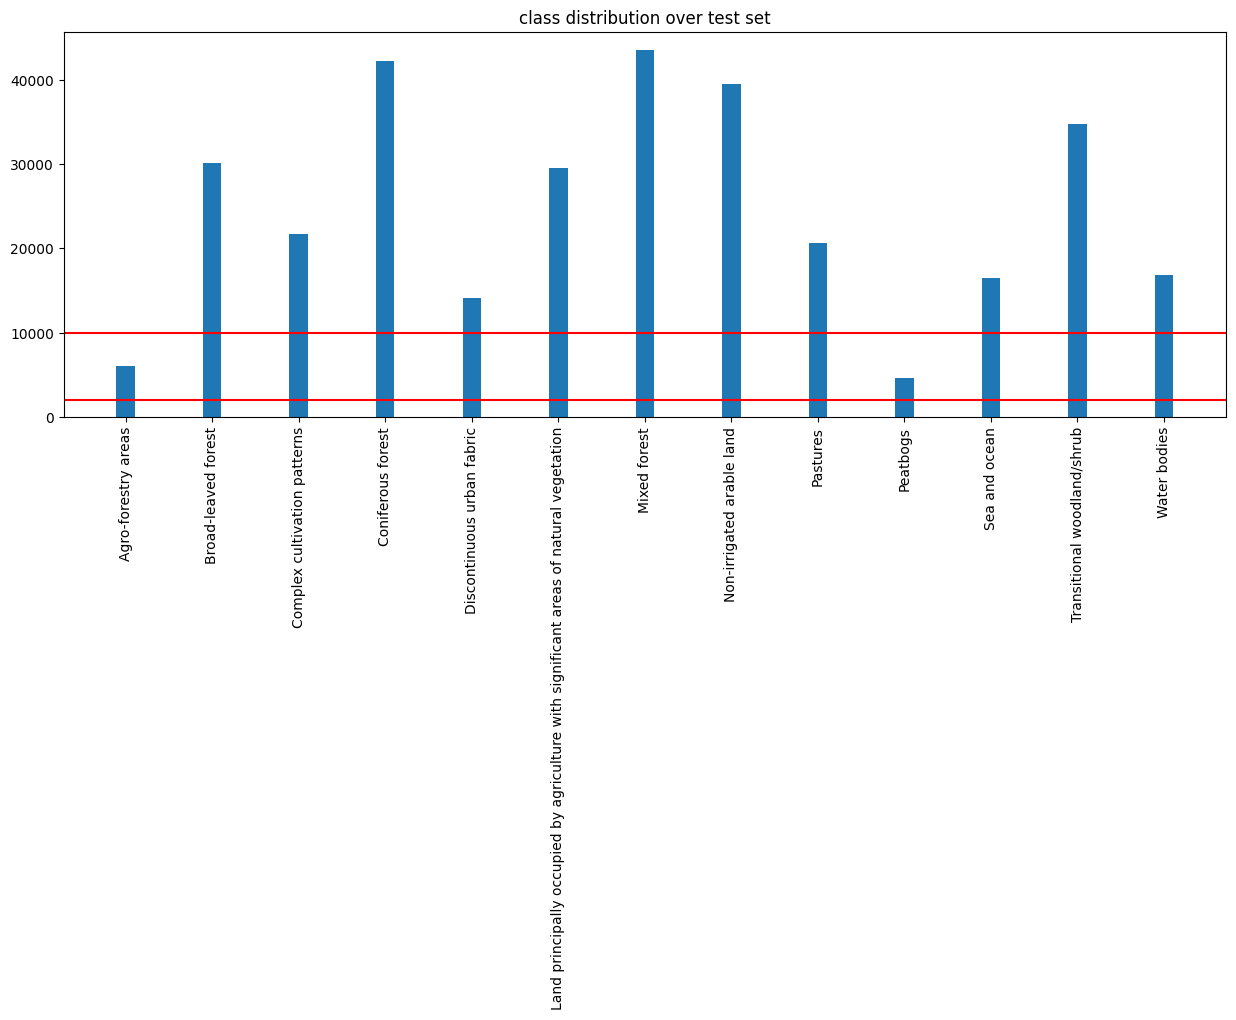

In [173]:
df_train = pd.read_csv("test_labels.csv")
sum_classes = df_train.sum()[1:]
sum_labels = sum_classes.values
plt.figure(figsize=(15,5))
plt.bar(np.linspace(0,45,len(sum_labels)),sum_labels)
plt.axhline(2000,color='r')
plt.axhline(10000,color='r')
plt.xticks(np.linspace(0,45,len(sum_labels)),np.array(df_pruned.columns)[1:],rotation=90)
plt.title("class distribution over test set")
plt.show()